# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The smartcab stays idle during the entire simulation. The smartcab does not update its status, so it appears that the simulation does not affect its state. During the beginning few trials, the driving agent begings to receive positive rewards as it is stopped at a red-light, however when the light changes the rewards begin to change directions into negative space, although the smartcab remains idle. This repeats itself, until the user ends the simulation.

When the smartcab idles at a greenlight with oncoming traffic, the rewards are positive but very small (close to zero), however the smartcab receives negative rewards for idling at a green light with no oncoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**


1) In the agent.py Python file, the three flags I selected are - learning, enforce_deadline and update_delay. 

-    **learning:** This flag is set if the agent is expected to learn using Q-learning. Currently, the default value within the agent.py file is set to False, so is not expected to change its default behavior during the simulation. This flag in turn seems to be effected by the parameters epsilon and alpha. 
-    **enforce_deadline:** This flag is set to True to enforce a deadline metric. Currently the agent has this flag set to False, so is not expected to comply with deadlines.
-    **update_delay:** This flag is used to speed up the simulation. This is done by decreasing the amount of time taken between actions. The default value is set to: continuous time (in seconds) between actions, default is 2.0 seconds. I have updated this parameter to 0.01 so I can iterate through my simulations quickly to get my results. I do not believe it makes sense to watch the smartcab go through the simulation at this point in the project as it is unable to create a positive reward system, and the smartcab is not moving.


2) In the environment.py Python file, the act() class function is called when an agent performs an action.


3) In the simulator.py Python file, the render_text() and render() functions both perform very similar tasks - displaying the current state of the simulation, however they do this in different ways. the render() function displays the current state of the simulation using the PyGame module (GUI interface), while the render_text() function displays the current state in a textual format. Both are useful as the GUI provides the current state in a visual format, while the textual information allows the user to scroll back to find historical information. 

4) In the planner.py file, the next_waypoint() function consideres if the destination is cardinally East or West of the location before the function consideres if the destination is cardinally North or South of the location.




-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


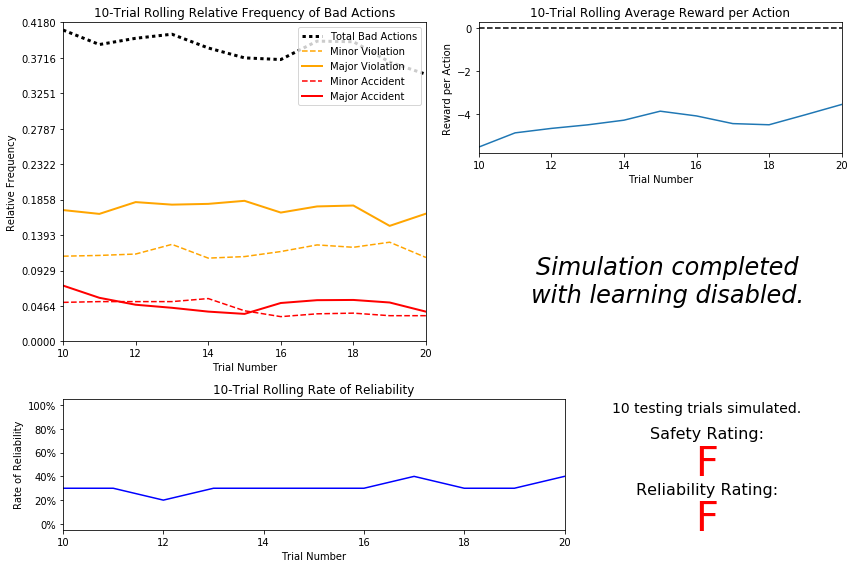

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

1) The driving agent is making bad decisions roughly 0.42% of the time during the trials. Of those bad decisions, less than 9% of the time was due to major accidents, while less than 4.6% of the time was from minor accidents. The bad decisions decreased during the trials to ~35%, and during this time the major accidents decreased to almost ~4.5%.

2) The the rate of reliability does make sense as we are not learning during our simulation (the learning flag is not set to True). This means we are not learning from trial to trial. Thus, a reliability rating of F would make sense given this condition.

3) The agents rewards appear to gradually increase over time. The rewards appear to have a domain of [-41, 3] throughout the lifecycle of the simulation. The improvement of the rewards over time appear to be related to the decrease in the Major Accidents, Minor Accidents, and Total Bad Actions, that is visible in the top left chart. Thus, there doesn't appear to be very heavily penalized for its actions, which can be due to a random reward probability system.

4) As the simulation goes on and the number of trials increase, the rate of reliability appears to improve slightly - from 30% to 40%. This increase in the rate of reliability is a false impression (random noise) as the smartcab has yet to begin learning, not yet smart. Also, it is important to state that we shouldn't be looking at increasing or decreasing trends for random agents, as they are either good or bad, and in this case the rate of reliability is bad.

5) This smartcab would be considered unsafe and not reliable for its passengers, due to the wide domain of the rewards, and the very low rate of reliability.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

All available features to the agent are important and relevant for learning both safety and efficiency. In particular, the specific environmental variables including whether there is oncoming traffic, the current state of the light, the inputs left, and the inputs oncoming can be used to influence the current state of the reward system. Inevitably, one needs to account for all observable features as the more known features greatly reduces the probability of unknown variables negatively affecting the safety and efficiency. However, the ones listed are the variables that I deem most appropriate features for our state reward system.

The two variables that I have ommitted are `'inputs: right'`, and `'deadline'`. I have ommitted the first as we are already including `'inputs: left'` and inevitably the direction of travel for a vehicle for the smartcab can only be one direction, the smartcab cannot have a left direction and a right direction, this does not make sense to me, which is why I have ommitted this variable. Second, I have ommitted `'deadline'` as the number of action remaining for the smartcab has no influence on the decision to reach its destination. Thus, this is an arbitrary variable.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

The sum of these state combinations are calculated by multiplying the number of possibilities for each feature together:
- 'waypoint' there are three possible states: forward, left, right
- 'light' there are two possible states: red, green
- 'inputs: left' there are four possible states: none, forward, left, right
- 'inputs: oncoming' there are four possible states: none, forward, left, right



$$  Combinations = \Sigma (waypoint*light*left*oncoming) = 3x2x4x4 = 96 $$
$$  Total-Combinations = \Sigma (waypoint*light*left*oncoming*right) = 3x2x4x4 = 384 $$

The total combination is calculated by multiplying an additional feature, 'inputs: right' to the combinations I choose. This feature has the same number of possible states as 'input: left' (None, forward, left, right)


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

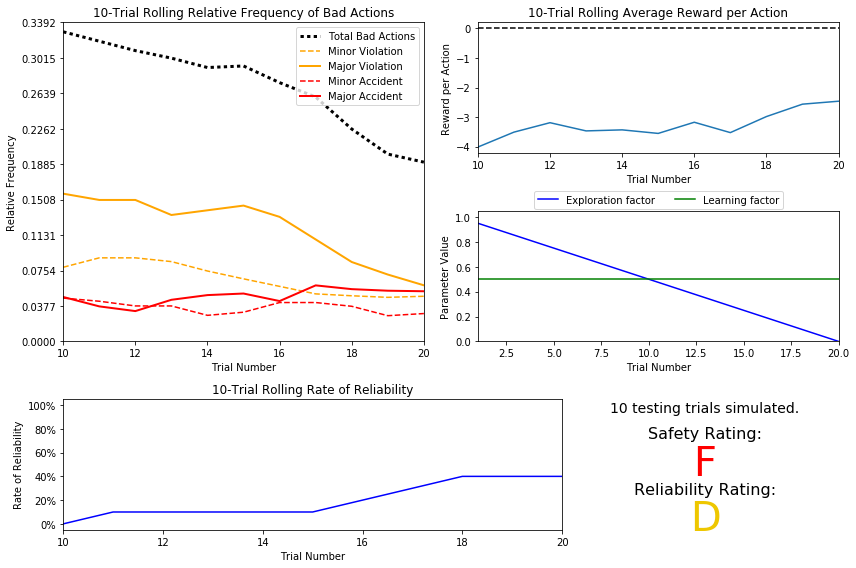

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

1) The default Q-Learning agent has a higher reliability rating, however the Major violations appear to begin aroun 15% of the time decreasing to ~6%, while the the time of Major accidents remain consistent throughtout the lifecycle of the simulation. Comparatively, these results are a drastic improvement relative to the basic driving agent. 

2) There were 20 training trails that were ran before the evalution trials began. Given that we began with an epsilon of 1.0, and degressed epsilon by 0.05 in each run, we know that after 20 training trials the epsilon will reach a threshold below 0.05, thus the agent will stop learning.

3) Yes, the decaying function that was implemented for $\epsilon$ does seem to be accurately represented in the parameters panel.

4) The number of bad actions decrease as the number of training trails increased during the simulation, which caused the average reward to increase.

5) The safety and reliability rating of 'F' and 'D', respectively,  is better than our results for the basic driving agent, which was 'F' and 'F', respectively.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

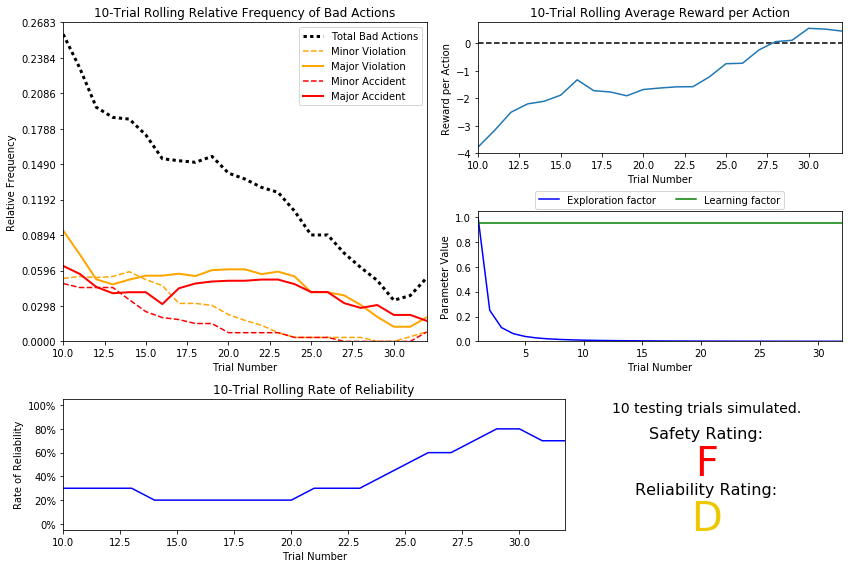

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

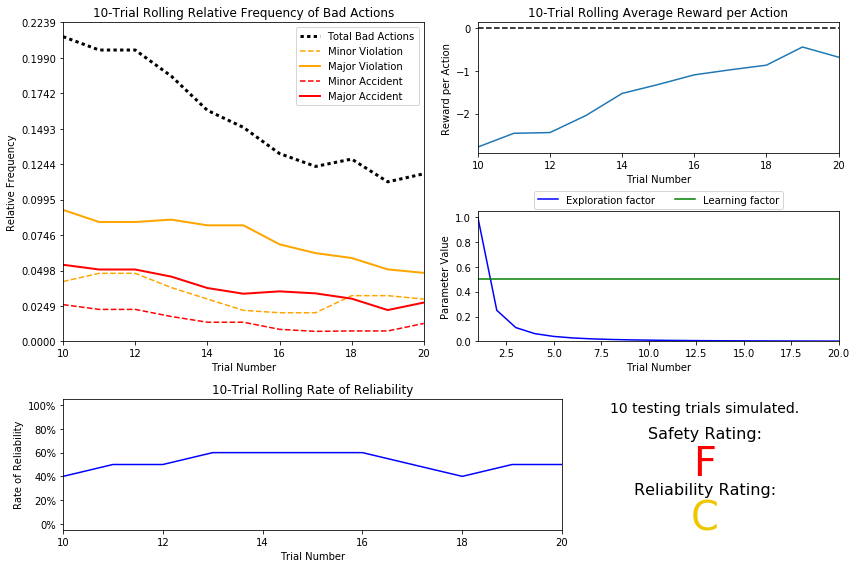

epsilon = 1.0/(t**2), alpha=0.05, tolerance=0.05


In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = 1.0/(t**2), alpha=0.05, tolerance=0.05")

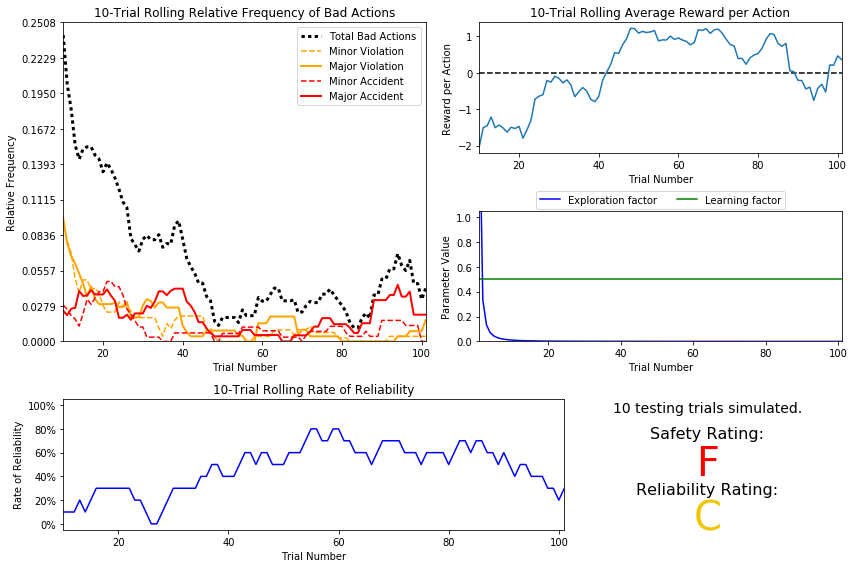

epsilon = 1.0/(t**2-at), alpha=0.5, tolerance=0.0001


In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# Simulation 3 - ϵ=1.0/(t^2-at),for 0<a<1
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = 1.0/(t**2-at), alpha=0.5, tolerance=0.0001")

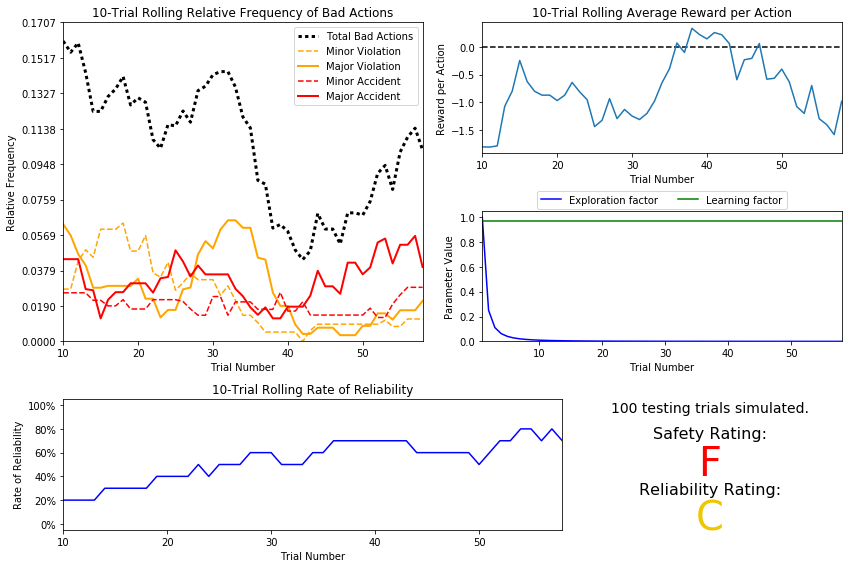

epsilon = 1.0/(t**2-at), alpha=0.97, tolerance=0.0003


In [10]:
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = 1.0/(t**2-at), alpha=0.97, tolerance=0.0003")

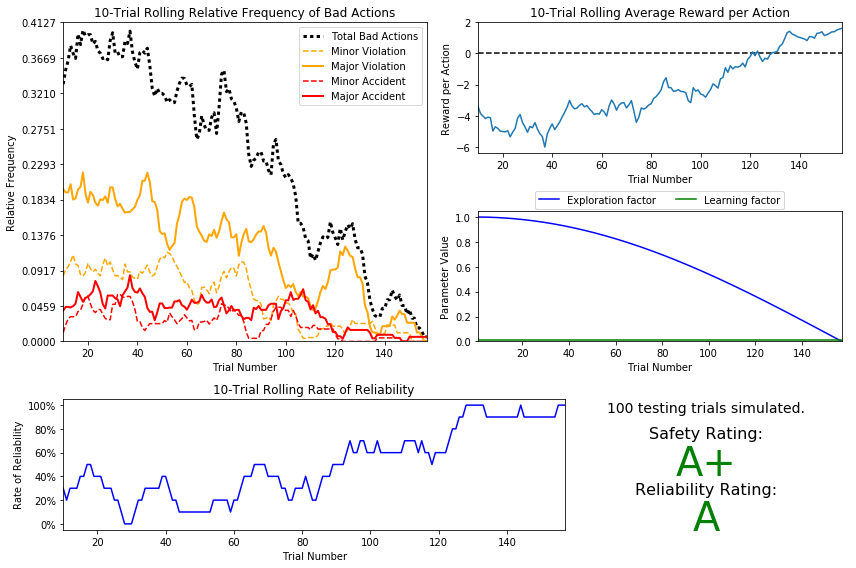

epsilon = ABS(COS(at)), alpha=0.01, tolerance=0.001, n_test=100


In [16]:
vs.plot_trials('sim_improved-learning.csv')
print("epsilon = ABS(COS(at)), alpha=0.01, tolerance=0.001, n_test=100")

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

The decaying function that showed the highest safety and reliability rating is - 

$$ \epsilon = abs(cos(at), \textrm{for } 0 < a < 1 $$

I ran this simulation roughly 15 times, changing the number of testing trials, tolerance level, and alpha (learning rate). The combination that proved to show the highest was a tolerance level of 0.001, learning rate of 0.01, and simulating over 100 testing trials. The very small learning rate proved to provide many more training trials to our simulation (this is due to epsilon decaying by 0.01 for each trial, resulting in over 150 training trials). 

The improvement is drastic in terms of total bad actions, major / minor violations and major / minor bad accidents decreasing to barely anytime - a major improvement.

The Q-learner results show that our driving agent successfully learned an appropriate policy, which can be shown from the improvement from the basic driving agent to the Q-Learning agent. I am satisfied with our results, as the damage and accidents are minimal compared to previous results. This is our best solution.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

# Answer: Question 8

My ideal optimal policy would resemble something similar to, see below:

If the light is red, the waypoint state should be right, as the traffic laws in the US allow some streets to make a right on red, while the states for the remaining features should be none. Unfortunately, the waypoint only has three available actions: forward, right, or left. Although there is no 'None' value for our waypoint feature, we can still achieve an Optimal policy as the agent still will stop at a red light when needed. It doesn't always take the action according to the waypoint, as the Q-Values(rewards) dictate what action the agent takes. This would look similar to:

## Example of Optimal Policy
** right-red-None-None **
- waypoint: when the light is red, the decision to move right would be optimal, going forward at a red light is not optimal as we cannot go forward at a red light
- left: suboptimal policy, although this is suboptimal the reward from the waypoint and the other states should offset this negative reward
- oncoming: this should be None if the light is red and there is no oncoming traffic

Looking into the file, `'sim_improved-learning.txt'` I am able to see the below policy resembling the above.

### Example: Optimal Policy of Reinforcement Learning
**Policy State:** forward-red-None-None

*Reward System*
 - forward : -3.19 
 - None : 1.27
 - right : 0.26
 - left : -3.10

This is the result of our reinforcement training working. The state with the highest reward, 'None' is matching that of our optimal policy.  The other rewards in this policy are showing that the forward was incorrect, left was incorrect, and right was suboptimal. US allows making rights on red, thus a positive reward.

## Example of Non-Optimal Policy
** left-red-forward-forward **
- waypoint: when the light is red, the decision to move right would be optimal, or to do nothing. However it would be non-optimal if the waypoint direction was anything else.
- left: this should be anything but forward as the light is red
- oncoming: this is telling us we having incoming traffic, and our waypoint direction went left, implying a collision

Looking into the file, `'sim_improved-learning.txt'` I am able to see the below policy resembling the above.

### Example: Optimal Policy of Reinforcement Learning
**Policy State:** forward-red-forward-None

*Reward System*
forward-red-forward-None
 - forward : -2.36
 - None : 0.35
 - right : -0.39
 - left : -2.34

This is the result of our reinforcement training working well because it provided us negative rewards for doing a bad action. We did receive a sub-optimal reward for 'None' however the rewards for the remaining features are negative implying that our Qlearning agent did not properly make the correct decision in the environment it was in. There was a collision as the light was red, however we did go forward when there was incoming traffic. 


### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

This project makes the connection that the smartcab only knows where its next waypoint is and not the destination. The smartcab is always working to move towards its destination. Thus, future rewards are not needed nor make sense as the agent can only make decisions based on the current environment it is in, and not making decisions based on what it make think it will be in the future. Additionally, the smartcab does not have a view of the entire grid, it only knows where the next waypoint is and makes decisions on the environment it is currently in, thus feature rewards will have no impact due to our current smartcab model and its inability to have an understanding of where it is located within the grid.

For example, if I was driving to Starbucks and I knew that there was going to be traffic on Main Street a mile away because my GPS (Waze) informed me of this, this would have an impact on how I would get to Starbucks, which road / highway / intersections I would use. The policy is calculated for each environment and resets after each trial. Understanding future environments and rewards will not work as our policy is only dependent on the current environment and the dummy variables revolving around it.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.